In [11]:
import pickle
import qutip
import numpy as np
import matplotlib.pyplot as plt
import stages_gutzwiller as stages

In [2]:
def click_probability(state, sim):
    p = 4 * sim.lmbd * sim.dt
    spin1 = qutip.basis(2, 1)
    projector1 = spin1 * spin1.dag()
    
    return p * projector1.overlap(state)**2# Note that I'm taking the overlap with the projector.

In [8]:
import stages_gutzwiller_config as config


trajectories = []
for sim in config.sim_list:
    f = open(f"data/no-click-gutzwiller-lambda={sim.lmbd}-T={sim.T}-dt={sim.dt}-omega0={sim.omegaS}.pkl", "rb")
    data = pickle.load(f)
    f.close()

    trajectories.append(data[1])

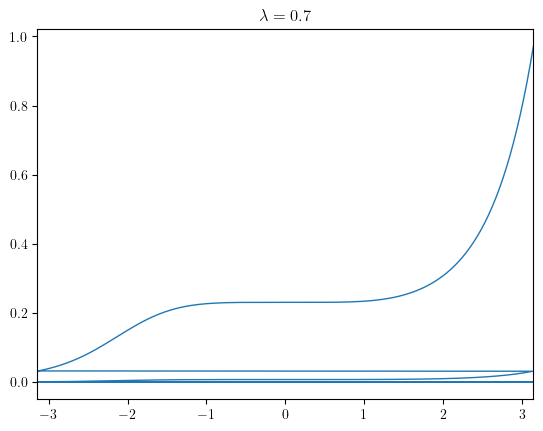

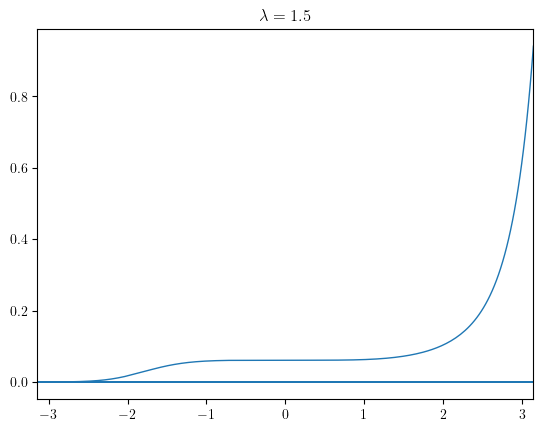

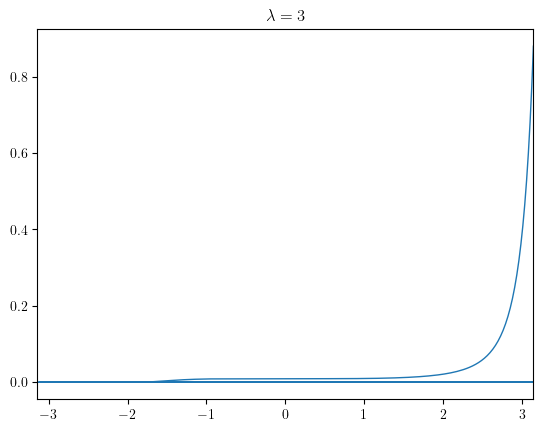

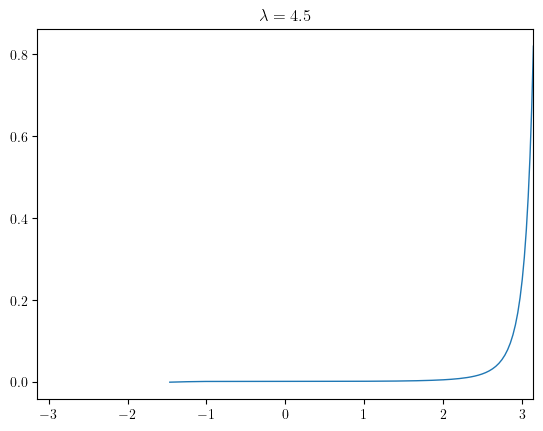

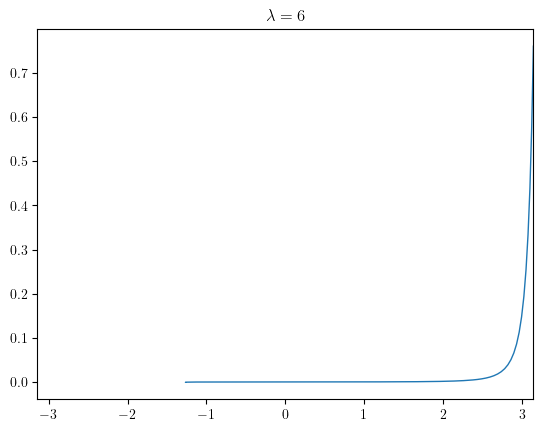

In [47]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for sim, traj in zip(config.sim_list, trajectories):
    t_all = np.arange(0, sim.T + 2*sim.dt, sim.dt)
    theta_t_all = np.empty_like(t_all)
    click_p_all = np.empty_like(t_all)
    for i, state in enumerate(traj):
        theta_t_all[i] = stages.state_to_theta(state)
        click_p_all[i] = click_probability(state, sim)

    no_click_p_all = np.cumprod(np.ones_like(t_all) - click_p_all)

    plt.figure()
    plt.plot(theta_t_all, no_click_p_all)

    plt.title(rf"$\lambda = {sim.lmbd}$")
    # plt.ylim( (0, 1) )
    plt.xlim( (-np.pi, np.pi) )

In [30]:
click_p_all

array([0.24      , 0.23994569, 0.23976873, ..., 0.02932202, 0.02932202,
       0.02932202])

In [31]:
cum_prob

array([0.76      , 0.94241304, 0.98619245, ..., 1.        , 1.        ,
       1.        ])

In [32]:
sim.dt

0.01

In [33]:
sim.lmbd

6

In [34]:
4*6/sim.dt

2400.0

In [44]:
for t in trajectories:
    print(stages.state_to_theta(t[0]))

3.141592653589793
3.141592653589793
3.141592653589793
3.141592653589793
3.141592653589793


In [45]:
no_click_p_all[0]

0.76

In [ ]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for sim, traj in zip(config.sim_list, trajectories):
    t_all = np.arange(0, sim.T + 2*sim.dt, sim.dt)
    theta_t_all = np.empty_like(t_all)
    click_p_all = np.empty_like(t_all)
    for i, state in enumerate(traj):
        theta_t_all[i] = stages.state_to_theta(state)
        click_p_all[i] = click_probability(state, sim)

    no_click_p_all = np.cumprod(np.ones_like(t_all) - click_p_all)

    plt.figure()
    plt.plot(t_all, theta_t_all)

    plt.title(rf"$\lambda = {sim.lmbd}$")
    # plt.ylim( (0, 1) )
    # plt.xlim( (-np.pi, np.pi) )